# 2141. Maximum Running Time of N Computers

You have n computers. You are given the integer n and a 0-indexed integer array batteries where the ith battery can run a computer for batteries[i] minutes. You are interested in running all n computers simultaneously using the given batteries.

Initially, you can insert at most one battery into each computer. After that and at any integer time moment, you can remove a battery from a computer and insert another battery any number of times. The inserted battery can be a totally new battery or a battery from another computer. You may assume that the removing and inserting processes take no time.

Note that the batteries cannot be recharged.

Return the maximum number of minutes you can run all the n computers simultaneously.

 

Example 1:

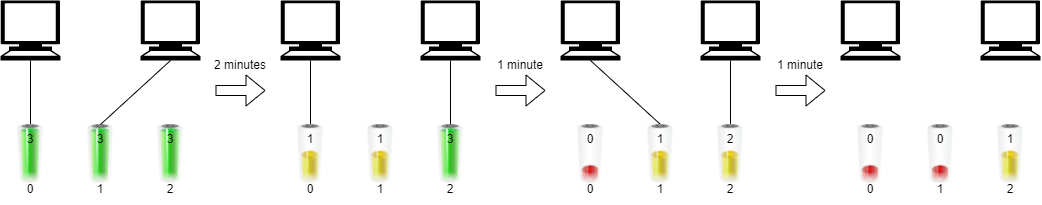


Input: n = 2, batteries = [3,3,3]
Output: 4
Explanation: 
Initially, insert battery 0 into the first computer and battery 1 into the second computer.
After two minutes, remove battery 1 from the second computer and insert battery 2 instead. Note that battery 1 can still run for one minute.
At the end of the third minute, battery 0 is drained, and you need to remove it from the first computer and insert battery 1 instead.
By the end of the fourth minute, battery 1 is also drained, and the first computer is no longer running.
We can run the two computers simultaneously for at most 4 minutes, so we return 4.

Example 2:

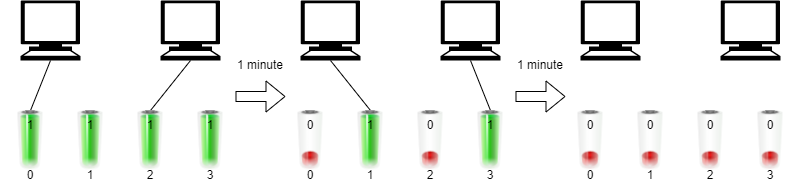


Input: n = 2, batteries = [1,1,1,1]
Output: 2
Explanation: 
Initially, insert battery 0 into the first computer and battery 2 into the second computer. 
After one minute, battery 0 and battery 2 are drained so you need to remove them and insert battery 1 into the first computer and battery 3 into the second computer. 
After another minute, battery 1 and battery 3 are also drained so the first and second computers are no longer running.
We can run the two computers simultaneously for at most 2 minutes, so we return 2.
 

Constraints:

1 <= n <= batteries.length <= 105
1 <= batteries[i] <= 109

## Solution: Binary Search

1. Whenever see a problem like finding maximum and monotonocity i.e if T is the max time then the computers can run from 0 to T time simultaneously, think of binary search.
2. For a given target time T, total running time = n*T
3. Contribution from each battery = min(T,batteries[i]). Sum up these contributions.
4. The computers can run simultaneously for all t where total contribution>=n*t. i,e for target time T, n*T>=total contribution
5. Use binary search to maximize t, search space: min=0, max=sum(batteries)/n (ideal case)

The idea is to think in terms of total run time instead of trying to simulate for each case. Looks a bit unintuitive at first, but this is an old trick in the book.

In [33]:
from typing import List
class Solution:
    def maxRunTime(self, n: int, batteries: List[int]) -> int:
        low=min(batteries)
        high=sum(batteries)//n
        while low<high:
            T=(low+high+1)//2 #1 is added to avoid infinte loop if low and high are 2 consecutive nos.
            total_contri=sum(min(T,b) for b in batteries)
            if total_contri>=n*T:
                low=T #Look for higher T, also the current T is also feasible
            else:
                high=T-1 # Look for lower T
        return low

sol=Solution()
sol.maxRunTime(n = 12, batteries = [11,89,16,32,70,67,35,35,31,24,41,29,6,53,78,83])

43